# LUNC Model

In [1]:
# Importing Python Packages

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Downloading data

df = pd.read_csv('lunc.csv', index_col = 'Date')
df.index = pd.to_datetime (df.index)
df.columns

Index(['Price', 'Volume', 'CirSupply', 'Velocity', 'Valuation'], dtype='object')

# Correlation Matrix

In [4]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,0.061195,-0.039987,-0.041588,0.001601,0.064397
Volume,-0.039987,0.290274,0.035410,0.254864,0.469741
CirSupply,-0.041588,0.035410,0.036041,-0.000631,-0.042850
Velocity,0.001601,0.254864,-0.000631,0.255495,0.512591
Valuation,0.064397,0.469741,-0.042850,0.512591,1.089579


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,1.000000,-0.300025,-0.885548,0.012803,0.249389
Volume,-0.300025,1.000000,0.346197,0.935865,0.835267
CirSupply,-0.885548,0.346197,1.000000,-0.006575,-0.216233
Velocity,0.012803,0.935865,-0.006575,1.000000,0.971517
Valuation,0.249389,0.835267,-0.216233,0.971517,1.000000


In [6]:
import statsmodels.api as sm

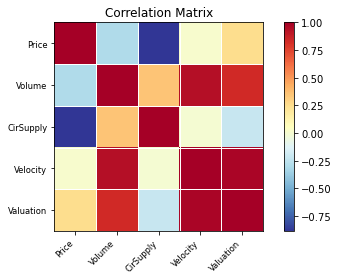

In [7]:
sm.graphics.plot_corr(corr_matrix, xnames=list(corr_matrix.columns))
plt.show()

In [8]:
val = df ['Valuation']

In [9]:
val.describe()

count    1.040000e+03
mean     2.740647e-01
std      2.298406e+00
min      2.690000e-07
25%      3.790045e-04
50%      4.632678e-03
75%      1.596989e-01
max      5.794030e+01
Name: Valuation, dtype: float64

# Chart Visualisation

In [10]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Download the data
data = pd.read_csv('lunc.csv',
                   parse_dates=['Date'],
                   index_col=['Date'])
data.head()

,Price,Volume,CirSupply,Velocity,Valuation
Date,,,,,
2019-10-15,0.5966,2180551,285472558,0.007638,0.000035
2019-10-16,0.5523,1752937,285463190,0.006141,0.000021
2019-10-17,0.5610,1933936,285475330,0.006774,0.000026
2019-10-18,0.5340,1735998,285432882,0.006082,0.000020
2019-10-19,0.5316,1156206,285457265,0.004050,0.000009


In [12]:
price = df ['Price']

In [13]:
price.describe()

count    1040.000000
mean       18.241185
std        29.011414
min         0.000048
25%         0.218850
50%         0.528500
75%        27.850000
max       116.410000
Name: Price, dtype: float64

In [14]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

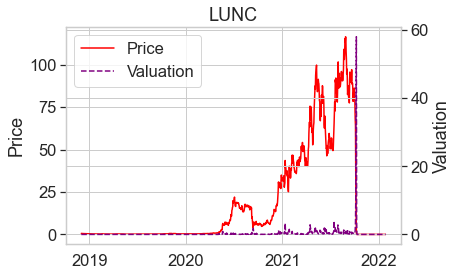

In [15]:
# Create figure and plot space
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(6, 4))
axb = ax.twinx()

# Add x-axis and y-axis
ax.plot(data.index.values, price, color='red', label='Price')

# Set title and labels for axes
ax.set(xlabel="",
       ylabel="Price",
       title="LUNC")

# Plotting on the second y-axis
axb.set_ylabel('Valuation')
axb.plot(data.index.values, val, color='purple', linestyle='--', label='Valuation')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=47))

plt.show()

# Linear Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Velocity vs Valuation'}, xlabel='Velocity', ylabel='Valuation'>

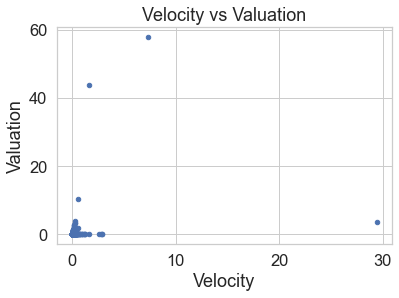

In [17]:
df.plot (kind='scatter', x='Velocity', y='Valuation', title='Velocity vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Circulation supply vs Valuation'}, xlabel='CirSupply', ylabel='Valuation'>

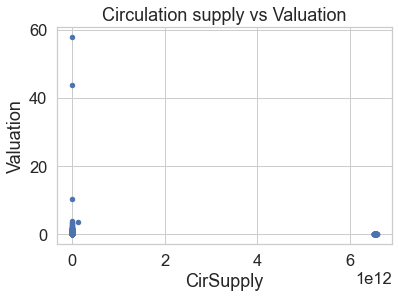

In [18]:
df.plot (kind='scatter', x='CirSupply', y='Valuation', title='Circulation supply vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Volume vs Valuation'}, xlabel='Volume', ylabel='Valuation'>

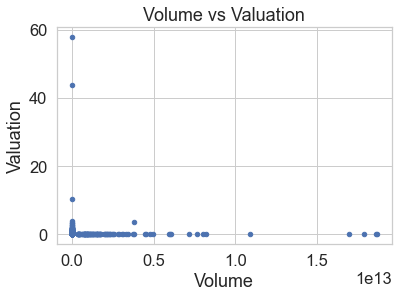

In [19]:
df.plot (kind='scatter', x='Volume', y='Valuation', title='Volume vs Valuation')

In [20]:
import sklearn.linear_model as lm

In [21]:
lr =lm.LinearRegression()

In [22]:
df.columns = df.columns.str.strip()

In [23]:
x = df.Volume       #Independent variable
y = df.Valuation        #Dependent variable

In [24]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1,1) #reshape to column

In [25]:
lr.fit (x,y)

LinearRegression()

Text(0.5, 0, 'Volume')

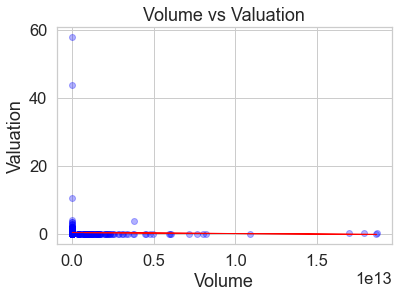

In [26]:
plt.scatter (x,y, color ='blue', alpha=0.3)
plt.plot (x, lr.predict (x), color = 'red', linewidth=1)
plt.title ('Volume vs Valuation')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

In [27]:
lr.predict (x)

array([0.28177579, 0.28177581, 0.2817758 , ..., 0.26775851, 0.26440158,
       0.25941574])

In [28]:
R_Sq = r2_score (y, lr.predict (x))
R_Sq

0.00032202477623299863

In [29]:
# Model Statistics

In [30]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Valuation~Volume',data=df).fit()
model1.params

Intercept    2.817759e-01
Volume      -2.954455e-14
dtype: float64

In [31]:
model1.pvalues

Intercept    0.000109
Volume       0.563223
dtype: float64

In [32]:
model1.rsquared

0.00032202477623299863

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3344
Date:                Sat, 03 Sep 2022   Prob (F-statistic):              0.563
Time:                        00:04:31   Log-Likelihood:                -2340.5
No. Observations:                1040   AIC:                             4685.
Df Residuals:                    1038   BIC:                             4695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2818      0.073      3.885      0.000       0.139       0.424
Volume     -2.954e-14   5.11e-14     -0.578      0.563    -1.3e-13    7.07e-14
==============================================================================
Omnibus:                     2439.685   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11020828.055
Skew:                          21.825   Prob(JB):                         0.00
Kurtosis:                     505.416   Cond. No.                     1.44e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
val_pred=model1.predict(pd.DataFrame(df['Volume']))
val_pred

Date
2019-10-15    0.281776
2019-10-16    0.281776
2019-10-17    0.281776
2019-10-18    0.281776
2019-10-19    0.281776
                ...   
2022-08-15    0.255292
2022-08-16    0.270483
2022-08-17    0.267759
2022-08-18    0.264402
2022-08-19    0.259416
Length: 1040, dtype: float64

In [35]:
df['val_pred']=-1.301119e-01*df['Volume']+3.395391e-08
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/693)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(226266289127.83344, 0.2740646703913464, 825594516815.1006)

# Multiple Linear Regression

In [36]:
import statsmodels.formula.api as smf
model2=smf.ols(formula='Valuation~Volume+Velocity',data=df).fit()
model2.params

Intercept    2.159616e-01
Volume      -1.609616e-13
Velocity     6.810238e-01
dtype: float64

In [37]:
val_pred=model2.predict(df[['Volume','Velocity']])
val_pred

Date
2019-10-15    0.221163
2019-10-16    0.220143
2019-10-17    0.220575
2019-10-18    0.220103
2019-10-19    0.218720
                ...   
2022-08-15    0.164482
2022-08-16    0.194006
2022-08-17    0.188705
2022-08-18    0.182176
2022-08-19    0.172475
Length: 1040, dtype: float64

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     41.89
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           3.21e-18
Time:                        00:04:47   Log-Likelihood:                -2300.3
No. Observations:                1040   AIC:                             4607.
Df Residuals:                    1037   BIC:                             4621.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2160      0.070      3.077      0.002       0.078       0.354
Volume      -1.61e-13   5.12e-14     -3.141      0.002   -2.62e-13   -6.04e-14
Velocity       0.6810      0.075      9.133      0.000       0.535       0.827
==============================================================================
Omnibus:                     2331.489   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8546224.847
Skew:                          19.605   Prob(JB):                         0.00
Kurtosis:                     445.361   Cond. No.                     1.58e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
import numpy as np
df['val_pred']=-3.726460e-01 + 2.499669e-08*df['Volume'] + 3.684614e+00*df['Velocity']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(43502.188614868006, 0.2740646703913464, 158729.64783366543)

In [40]:
import statsmodels.formula.api as smf
model3=smf.ols(formula='Valuation~Volume+Velocity+CirSupply',data=df).fit()
model3.params

Intercept    2.230810e-01
Volume      -1.477609e-13
Velocity     6.786213e-01
CirSupply   -1.635103e-14
dtype: float64

In [41]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     27.95
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           2.21e-17
Time:                        00:04:56   Log-Likelihood:                -2300.2
No. Observations:                1040   AIC:                             4608.
Df Residuals:                    1036   BIC:                             4628.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2231      0.073      3.068      0.002       0.080       0.366
Volume     -1.478e-13   6.22e-14     -2.376      0.018    -2.7e-13   -2.57e-14
Velocity       0.6786      0.075      9.064      0.000       0.532       0.826
CirSupply  -1.635e-14   4.35e-14     -0.376      0.707   -1.02e-13    6.89e-14
==============================================================================
Omnibus:                     2332.041   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8558441.443
Skew:                          19.615   Prob(JB):                         0.00
Kurtosis:                     445.678   Cond. No.                     2.56e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
val_pred=model3.predict(df[['Volume','Velocity','CirSupply']])
val_pred

Date
2019-10-15    0.228260
2019-10-16    0.227243
2019-10-17    0.227673
2019-10-18    0.227203
2019-10-19    0.225825
                ...   
2022-08-15    0.075552
2022-08-16    0.098462
2022-08-17    0.094340
2022-08-18    0.089265
2022-08-19    0.081723
Length: 1040, dtype: float64

In [43]:
import numpy as np
df['val_pred']=-0.3919 + 2.436e-08*df['Volume'] + 3.7717*df['Velocity'] + 1.105e-10*df['CirSupply']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(42555.50731082158, 0.2740646703913464, 155275.42185592584)

In [44]:
model4=smf.ols(formula='Volume~Velocity+CirSupply',data=df).fit()
rsquared=model4.rsquared 
VIF=1/(1-rsquared)
VIF

1.5973391009441815

# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [46]:
x=df.Volume
y=df.Valuation

In [47]:
degree=2
model5=make_pipeline (PolynomialFeatures (degree), lr)

In [48]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1, 1) #reshape to column

In [49]:
model5.fit (x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 8.959999999999994, 'Volume')

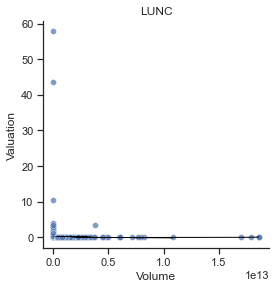

In [51]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="Volume", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.plot (x, model5.predict (x), color='black', linewidth=.5)
plt.title ('LUNC')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

Text(0.5, 8.959999999999994, 'Circulation Supply')

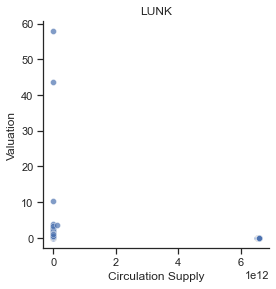

In [53]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="CirSupply", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.title ('LUNK')
plt.ylabel ('Valuation')
plt.xlabel ('Circulation Supply')